In [131]:
import numpy as np
import matplotlib.pyplot as plt

# K-Means Clustering Implementation

In [132]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    # Set K
    K = centroids.shape[0]

    # For each training example, which cluster idx is closest stored here
    idx = np.zeros(X.shape[0], dtype=int)

    # For each training example m
    for i in range(len(idx)):

        # Set the distance to be - infinite and minK corresponding to min distance as -1
        minDist = float("inf")
        minK = -1

        # For each centroid k
        for k in range(K):

            # Calculate the distance between the ith example and the kth centroid
            dist = sum((X[i] - centroids[k]) ** 2)

            # If its lesser than the previous min distance, update the minK and minJ
            if dist < minDist:
                minDist = dist
                minK = k


        idx[i] = minK

    return idx

In [133]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    m, n = X.shape

    centroids = np.zeros((K, n))


    #Initialize sums as an accumulator that aggregates the sum of all elements x_i assigned to the centroid idx[i],
    #and count which tallies the number of elements x_i assigned to idx[i]. Since x[i] is n-dimensional,
    #we need to calculate the average across all n dimensions, necessitating a K x n size for sums.
    #As count simply tracks the quantity of examples, it requires a size of K.

    sums = np.zeros((K, n))
    counts = np.zeros((K,))

    # For each example, increment the sums[idx[i]] and counts[idx[i]] where idx[i] gives the idx of closest centroid
    for i in range(len(idx)):

        # Add it to the sums[idx[m]] and increment count[idx[m]]
        sums[idx[i]]+= X[i]
        counts[idx[i]] += 1

    # Finally find the mean
    for k in range(K):
        centroids[k] = sums[k] / counts[k]

    return centroids

In [134]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [135]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

# Image Compression

In [136]:
# Load an image
original_img = plt.imread('img1.png')

(-0.5, 799.5, 599.5, -0.5)

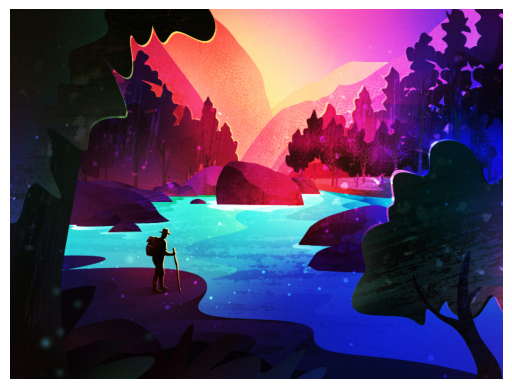

In [137]:
# Visualizing the image
plt.imshow(original_img)
plt.axis('off')

In [138]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (600, 800, 3)


In [139]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [140]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 25
max_iters = 10

# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [141]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (480000,)
Closest centroid for the first five elements: [1 1 7 1 1]


In [142]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

(-0.5, 799.5, 599.5, -0.5)

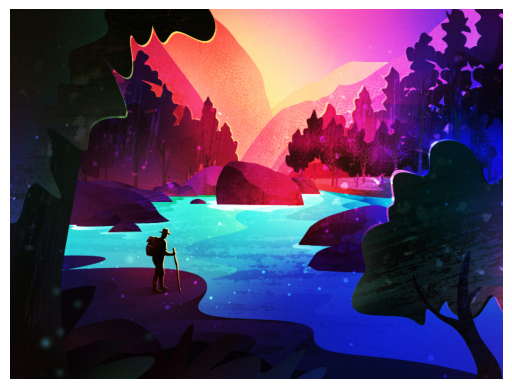

In [143]:
plt.imshow(original_img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

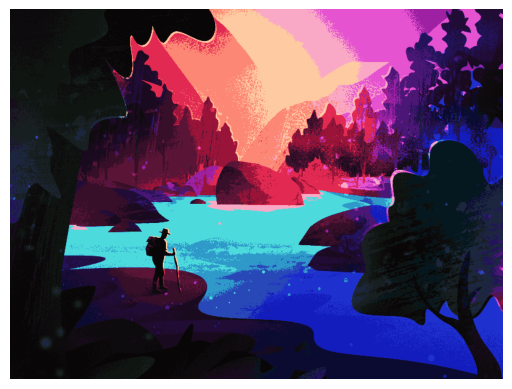

In [144]:
plt.imshow(X_recovered)
plt.axis('off')

In [145]:
plt.imsave('res.png', X_recovered)